In [1]:
# print_function for compatibility with Python 3
from __future__ import print_function
# NumPy for numerical computing
import numpy as np
# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns
# Scikit-Learn for Modeling
import sklearn
# Pickle for saving model files
import pickle

In [2]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [3]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline
# For standardization
from sklearn.preprocessing import StandardScaler
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV
# Classification metrics (added later)
from sklearn.metrics import roc_curve,auc

In [4]:
# Load analytical base table from Module 2
df=pd.read_csv('project_files/analytical base table.csv')

In [5]:
# Create separate object for target variable
y=df.status

# Create separate object for input features
X=df.drop('status',axis=1)

In [6]:
# Split X and y into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=1234,stratify=df.status)

# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train),len(X_test),len(y_train),len(y_test))

11254 2814 11254 2814


In [7]:
# Pipeline dictionary
pipelines={'l1':make_pipeline(StandardScaler(),LogisticRegression(penalty='l1',random_state=123)),
           'l2':make_pipeline(StandardScaler(),LogisticRegression(penalty='l2',random_state=123)),
           'rf':make_pipeline(StandardScaler(),RandomForestClassifier(random_state=123)),
           'gb':make_pipeline(StandardScaler(),GradientBoostingClassifier(random_state=123))
          
          }

In [8]:
# List tuneable hyperparameters of our Logistic pipeline
pipelines['l1'].get_params()

{'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l1', random_state=123, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'ovr',
 'logisticregression__n_jobs': 1,
 'logisticregression__penalty': 'l1',
 'logisticregression__random_state': 123,
 'logisticregression__solver': 'liblinear',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False,
 'memory': None,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': Tru

In [9]:
# Logistic Regression hyperparameters
l1_hyperparameters={'logisticregression__C':np.linspace(1e-3,1e3,10)}
l2_hyperparameters={'logisticregression__C':np.linspace(1e-3,1e3,10)}

In [10]:
pipelines['gb'].get_params()

{'gradientboostingclassifier': GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=100,
               presort='auto', random_state=123, subsample=1.0, verbose=0,
               warm_start=False),
 'gradientboostingclassifier__criterion': 'friedman_mse',
 'gradientboostingclassifier__init': None,
 'gradientboostingclassifier__learning_rate': 0.1,
 'gradientboostingclassifier__loss': 'deviance',
 'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__max_features': None,
 'gradientboostingclassifier__max_leaf_nodes': None,
 'gradientboostingclassifier__min_impurity_decrease': 0.0,
 'gradientboostingclassifier__min_impurity_split': None,
 'gradientboostingclassif

In [11]:
# Random Forest hyperparameters
rf_hyperparameters={'randomforestclassifier__n_estimators':[100,200],
                   'randomforestclassifier__max_features':['auto','sqrt',.33]}

In [12]:
# Boosted Tree hyperparameters
gb_hyperparameters={'gradientboostingclassifier__n_estimators':[100,200],
                   'gradientboostingclassifier__max_depth':[1,3,5],
                   'gradientboostingclassifier__learning_rate':[.05,.1,.2]}

In [13]:
# Create hyperparameters dictionary
hyperparameters={'l1':l1_hyperparameters,
                 'l2':l2_hyperparameters,
                 'rf':rf_hyperparameters,
                 'gb':gb_hyperparameters}

In [14]:
# Create empty dictionary called fitted_models

fitted_models={}
# Loop through model pipelines, tuning each one and saving it to fitted_models
for name,pipeline in pipelines.items():
    
    # Create cross-validation object from pipeline and hyperparameters
    model=GridSearchCV(pipeline,hyperparameters[name],cv=10)
    
    # Fit model on X_train, y_train
    model.fit(X_train,y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name]=model
    
    # Print '{name} has been fitted'
    print(name,'has been fitted')

rf has been fitted
l2 has been fitted
gb has been fitted
l1 has been fitted


In [15]:
# Display best_score_ for each fitted model
for name,model in fitted_models.items():
    print(name,model.best_score_)

rf 0.979651679403
l2 0.849386884663
gb 0.975208814644
l1 0.849386884663


In [16]:
# Classification metrics
from sklearn.metrics import roc_curve, auc

In [17]:
# Predict classes using L1-regularized logistic regression 
pred=fitted_models['l1'].predict(X_test)

# Display first 5 predictions
pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [18]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Display confusion matrix for y_test and pred
print(confusion_matrix(y_test,pred))

[[1969  172]
 [ 221  452]]


In [19]:
# Predict PROBABILITIES using L1-regularized logistic regression
pred=fitted_models['l1'].predict_proba(X_test)

# Get just the prediction for the positive class (1)
pred=[pre[1] for pre in pred]

# Display first 5 predictions
pred[:5]

[0.030570398675690134,
 0.0044425130215441566,
 0.0072964681969699954,
 0.088094889662932246,
 0.071150346284883093]

In [20]:
# Calculate ROC curve from y_test and pred
fpr,tpr,threshold =roc_curve(y_test,pred)

In [21]:
# Store fpr, tpr, thresholds in DataFrame and display last 10
pd.DataFrame({'FPR':fpr,'TPR':tpr,'threshold':threshold}).tail(10)

,FPR,TPR,threshold
532,0.759925,0.994056,0.009628
533,0.784680,0.994056,0.008120
534,0.784680,0.995542,0.008077
535,0.910322,0.995542,0.001963
536,0.910322,0.997028,0.001950
537,0.932742,0.997028,0.001394
538,0.932742,0.998514,0.001388
539,0.949089,0.998514,0.001051
540,0.949089,1.000000,0.001040
541,1.000000,1.000000,0.000027


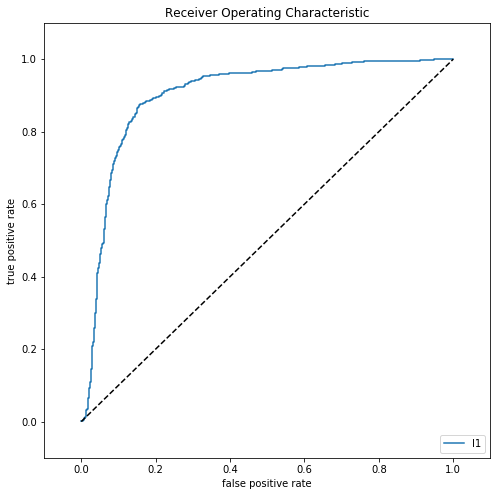

In [22]:
# Initialize figure
fig=plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')
# Plot ROC curve
plt.plot(fpr,tpr,label='l1')
plt.legend(loc='lower right')
# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('true positive rate')
plt.xlabel('false positive rate')
plt.show()


To calculate AUROC, use the <code style="color:steelblue">auc()</code> function we imported earlier in conjunction with the <code style="color:steelblue">roc_curve()</code> function.

In [23]:
# Calculate ROC curve
fpr,tpr,threshold=roc_curve(y_test,pred)
# Calculate AUROC
print(auc(fpr,tpr))

0.901539531388


In [24]:
# Code here
for name,model in fitted_models.items():
    pred=model.predict_proba(X_test)
    pred=[pre[1] for pre in pred]
    fpr,tpr,threshold=roc_curve(y_test,pred)
    print(name,auc(fpr,tpr))


rf 0.991520189216
l2 0.901538837374
gb 0.988680283685
l1 0.901539531388


In [25]:
# Save winning model as final_model.pkl
with open('final_model.pkl','wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_,f)